# Netflix Data Analysis Project

## Introduction

Netflix has revolutionized the entertainment industry with its vast library of movies and TV shows. This project aims to analyze Netflix’s content dataset to uncover trends, predict future releases, and build recommendation systems using Python, Data Analysis, and Machine Learning.

By exploring factors like release patterns, genre popularity, and viewer preferences, we can gain insights into Netflix’s content strategy and even predict future trends. This project is ideal for data science enthusiasts looking to work on real-world datasets with exploratory analysis, visualization, and predictive modeling.

---

## Project Objectives

**1. Exploratory Data Analysis (EDA)**

* Analyze the distribution of movies vs. TV shows.

* Identify trends in release years and monthly additions.

* Explore top genres, directors, and countries producing content.

**2. Data Visualization**

* creating a chart to estimate movie runtime distribution on Netflix

* Generate word clouds for movie titles.

---

## Tools & Technologies Used

**1. Data Handling & Analysis**
    
* Python (Pandas, NumPy) – Data cleaning & manipulation.

**2. Data Visualization**

* Matplotlib & Seaborn – Static plots (bar, line, histograms).

* WordCloud – Text visualization.

**3. Machine Learning**

* StatsModels (ARIMA) – Time series forecasting.

---

**Dataset Used**

* Netflix Movies & TV Shows Dataset:

* Contains: [title, type, director, release_year, date_added, rating, duration, country, genres, etc.]

---

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
data = pd.read_csv('netflix1.csv')

In [3]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
data.shape

(8790, 10)

### Cleaning Dataset

In [6]:
data = data.drop_duplicates()

In [7]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

---

### Exploratory Data Analysis

#### Plots to show Netflix's Content Analysis

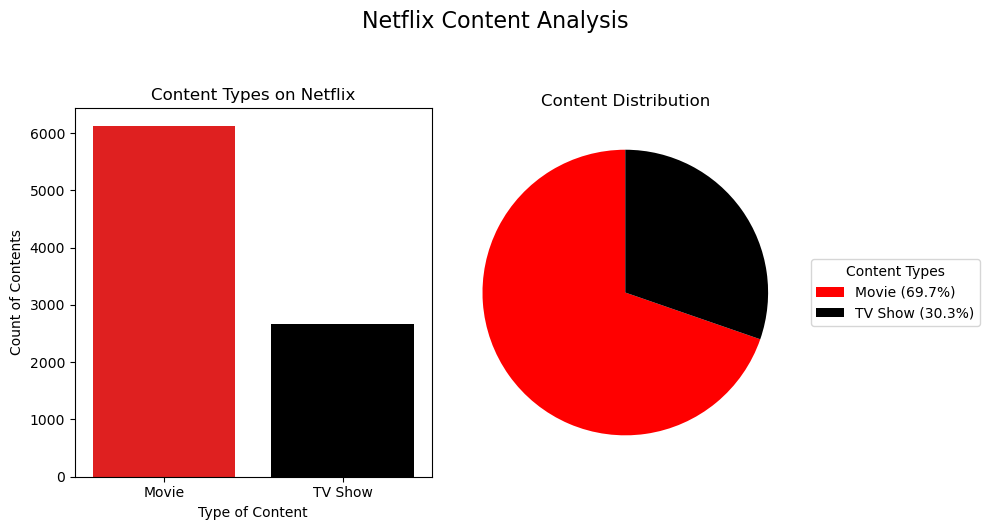

In [8]:
content_counts = data['type'].value_counts()
percentages = (content_counts / content_counts.sum()) * 100

plt.figure(figsize=(10, 5))

# First plot - Countplot (bar chart)
plt.subplot(1, 2, 1)  
sns.countplot(data=data, x='type', palette=['Red', 'Black'])  
plt.title('Content Types on Netflix', fontsize=12)
plt.xlabel('Type of Content', fontsize=10)
plt.ylabel('Count of Contents', fontsize=10)

# Second plot - Pie chart
plt.subplot(1, 2, 2)  
wedges, texts = plt.pie(content_counts, colors=['Red', 'Black'],  
                        startangle=90)  # Starts pie at top

legend_labels = [f"{label} ({percent:.1f}%)" 
                for label, percent in zip(content_counts.index, percentages)]

plt.legend(wedges, legend_labels,
          title="Content Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Content Distribution', fontsize=12)

# Main title for the whole figure
plt.suptitle('Netflix Content Analysis', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

**Chart Interpretation**

**Count Plot(Content Types on Netflix)**

* This chart shows total count of content and types of content available in the dataset.

* There are total more than 6000 Movies and around 2800 TV Shows on Netflix platform.

**Pie Chart(Content Distribution)**

* The pie chart is divided in two slices as Content Types.

* This chart shows distribution of Movies around 69.7% and TV Shows 30.3% accordingly.

---

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [10]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

#### Movies and TV Shows Ratings on Netflix

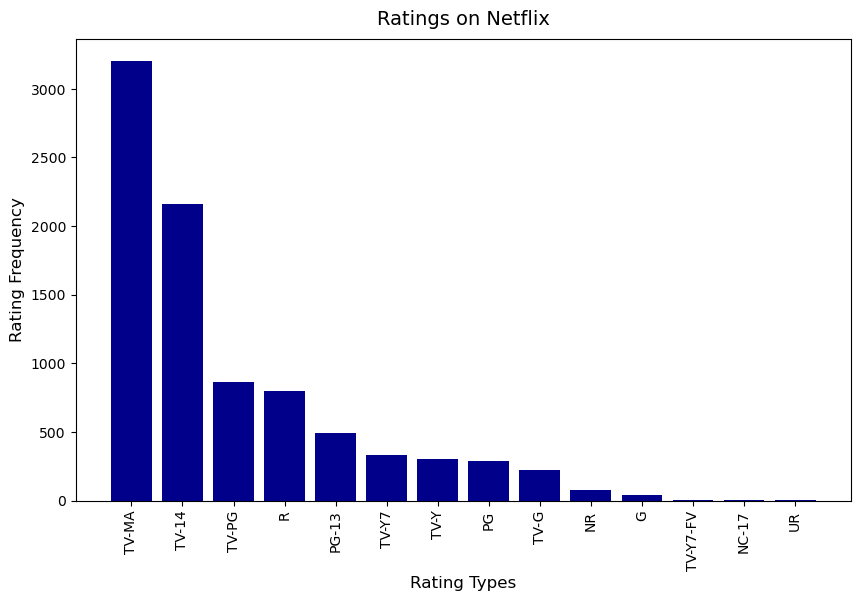

In [11]:
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6)), 
plt.bar(ratings['rating'], ratings['count'], color='darkblue')
plt.title('Ratings on Netflix', fontsize=14, pad=10)
plt.xticks(rotation=90)
plt.xlabel("Rating Types", fontsize=12)
plt.ylabel("Rating Frequency", fontsize=12)
plt.show()

**Chart Interpretation**

* This is the Bar Plot for 'Ratings on Netflix' platform for Movies and TV Shows.

* This plot indicates total ratings for each Movie and TV Show genres.

* The highest rating frequency is 'TV-MA' surpassing more than 3000 and least is 'UR' which is nearly 5-10.

Text(0.5, 1.0, 'Rating on Netflix')

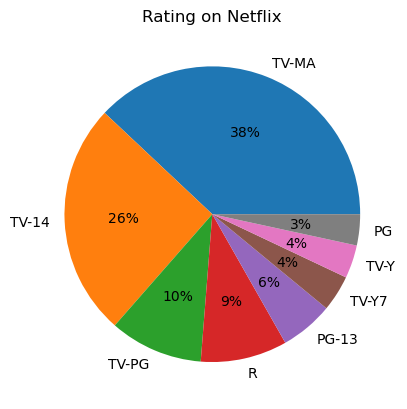

In [12]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],
autopct='%.0f%%')
plt.title('Rating on Netflix', fontsize=12)

**Chart Interpretation**

* This Pie chart shows "Rating on Netflix" platform for Movies and TV Shows. 

* It is divided into multiple slices.

* The Highest rating on Netflix is for TV_MA 38% and lowest rating is PG 3%.

In [13]:
# lets convert column date_added to datetime.
data['date_added']=pd.to_datetime(data['date_added'])

* converting 'date_added' column data type object to 'datetime'

In [14]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [15]:
data['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

---

### Exploratory Data Analysis

#### Top 10 countries with most content on Netflix

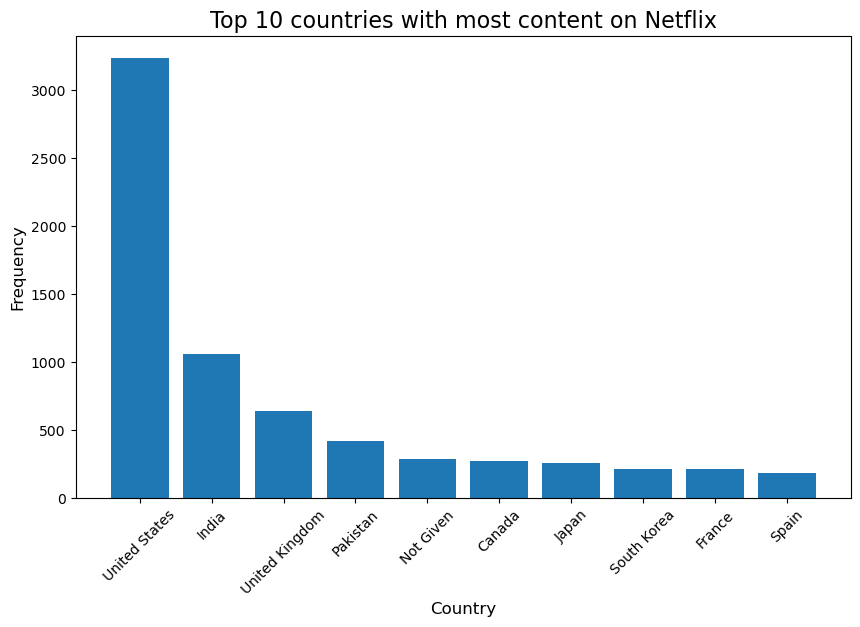

In [16]:
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'])
plt.title("Top 10 countries with most content on Netflix", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Interpretation of "Top 10 Countries with Most Content on Netflix" Chart**

**1. Dominance of the United States**

* The U.S. ranks #1, indicating it produces the highest volume of Netflix content.

* This aligns with Netflix being a U.S.-based company and Hollywood’s global influence.

**2. Strong Presence of Asian Markets**

* India (#2), Japan (#7), and South Korea (#8) highlight Netflix’s investment in localized content for these high-growth regions.

* Example: Korean dramas (Squid Game) and Indian films (RRR) have gained global popularity.

**3. European Representation**

* The UK (#3), France (#9), and Spain (#10) reflect Netflix’s strategy to cater to diverse European audiences.

**4. Data Quality Note: "Not Given"**

* The #5 spot being "Not Given" suggests missing metadata in the dataset. This could skew analysis if unaddressed.

**5. Strategic Insights**

* Netflix prioritizes English-speaking markets (U.S., UK, Canada) and high-population regions (India, Pakistan).

* Underrepresented regions (Africa, Latin America) may indicate untapped opportunities for content expansion.

In [17]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

* converting 'day', 'month', 'year' data types as 'datetime' in date_added column

#### Monthly releases of Movies and Series on Netflix

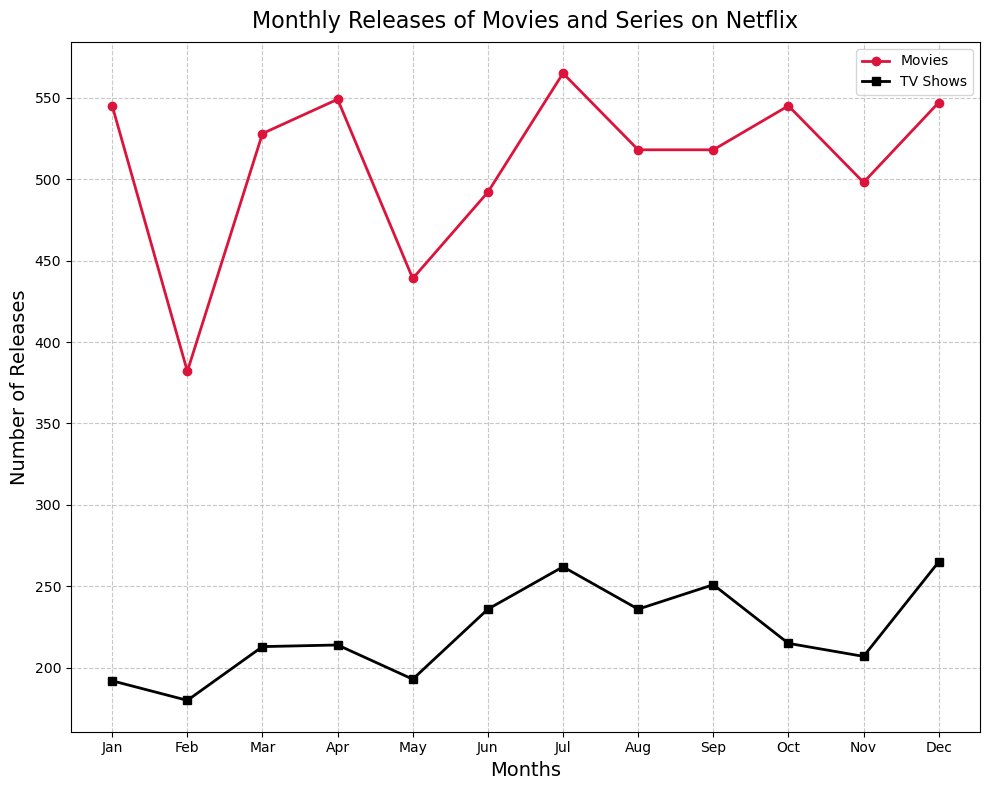

In [18]:
# Filter and count monthly releases
monthly_movies = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_series = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.plot(monthly_movies.index, monthly_movies, 
         label='Movies', color='crimson', marker='o', linewidth=2)
plt.plot(monthly_series.index, monthly_series, 
         label='TV Shows', color='black', marker='s', linewidth=2)


plt.title("Monthly Releases of Movies and Series on Netflix", fontsize=16, pad=10)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Number of Releases", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.legend(frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Interpretation of "Monthly Releases of Movies and Series on Netflix" Chart**

**1. Peak Release Months:**

* January and December show the highest number of releases around 500-550, likely due to:

* Holiday season demand (Christmas, New Year).

* Award season (Oscars, Golden Globes) pushing new content.

* July-August also see a slight surge, possibly targeting summer viewers.

**2. Lowest Release Months:**

* February, April, and September have the fewest releases around 250-300, possibly due to:

* Post-holiday slowdown.

* Strategic gaps between major content drops.

#### Yearly releases of Movies and Series on Netflix

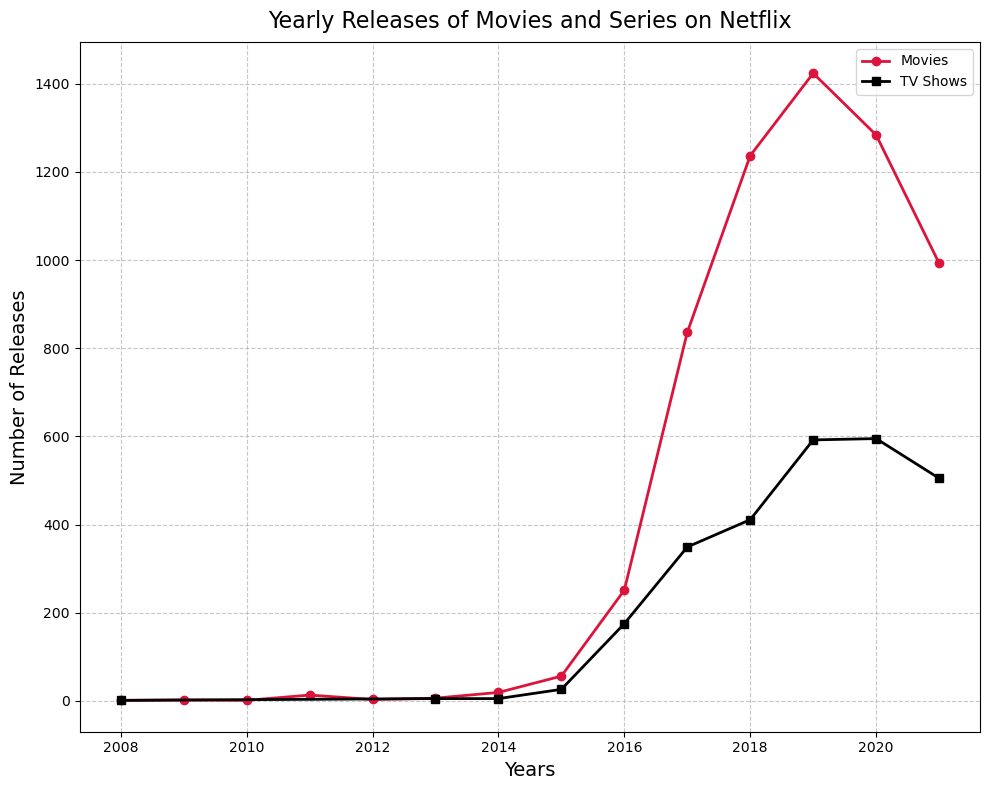

In [19]:
# Filter and count monthly releases
yearly_movies = data[data['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_series = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.plot(yearly_movies.index, yearly_movies, 
         label='Movies', color='crimson', marker='o', linewidth=2)
plt.plot(yearly_series.index, yearly_series, 
         label='TV Shows', color='black', marker='s', linewidth=2)


plt.title("Yearly Releases of Movies and Series on Netflix", fontsize=16, pad=10)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Number of Releases", fontsize=14)
plt.legend(frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretation of "Yearly Releases of Movies and Series on Netflix" Chart**

**1. Exponential Growth (2016–2020):**

* Both Movies and TV Shows show a sharp increase post-2016, likely due to:

* Netflix’s global expansion into original content production.

* Heavy investments in Netflix Originals (Stranger Things, The Crown).

**2. TV Shows Overtaking Movies (Post-2018):**

* TV Shows surpassed Movies in release volume around 2018, reflecting:

* A strategic shift toward binge-worthy series (higher subscriber retention).

* Rising popularity of limited series and anthologies (Black Mirror).

**3. Early Years (Pre-2014):**

* Low release counts suggest Netflix was primarily a licensing platform (not yet producing originals at scale).


#### Top 10 popular movie genres

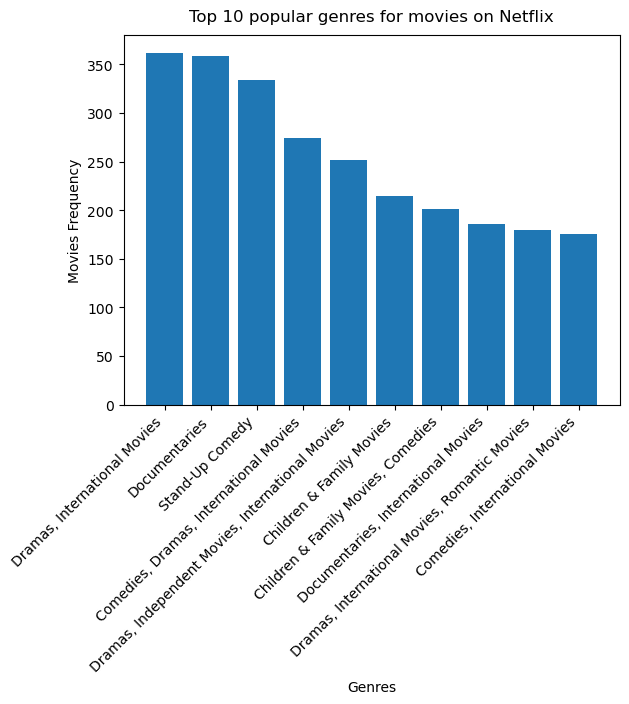

In [20]:
popular_movie_genre = data[data['type'] == 'Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre = data[data['type'] == 'TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.title("Top 10 popular genres for movies on Netflix", fontsize=12, pad=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres", fontsize=10)
plt.ylabel("Movies Frequency", fontsize=10)
plt.show()

**Interpretation of "Top 10 Popular Genres for Movies on Netflix" Chart**

**1. Dominant Genres**

* International Movies and Dramas are the most frequent, reflecting:

* Netflix’s global content strategy (non-English films like Parasite, Roma).

* High demand for emotional storytelling (dramas resonate across cultures).

* Comedies and Children & Family Movies also rank highly, showing:

* A focus on lighthearted, accessible content for broad audiences.

* Family-friendly offerings to retain household subscriptions.

**2. Hybrid Genres**

* Many labels combine genres (e.g., "Comedies, Dramas, International Movies"), suggesting:

* Cross-genre appeal (e.g., a comedy-drama like The Farewell).

* Algorithmic tagging (Netflix often categorizes content in multiple genres).

**3. Data Oddities**

* Repetition of "International Movies":

* May indicate overlapping tags or inconsistent data formatting.

* Truncated Labels (e.g., "mas, Independent Movies"):

* Likely a visualization error (cut-off text). Needs data cleaning.

#### Top 10 TV Shows genres

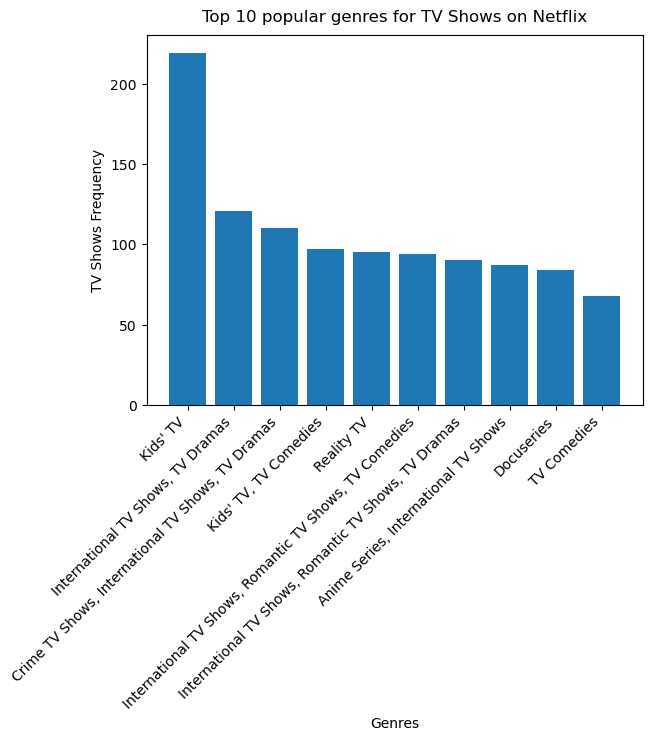

In [21]:
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.title("Top 10 popular genres for TV Shows on Netflix", fontsize=12, pad=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres", fontsize=10)
plt.ylabel("TV Shows Frequency", fontsize=10)
plt.show()

**Interpretation of "Top 10 Popular Genres for TV Shows on Netflix" Chart**

**1. Dominant Genres**

* International TV Shows & TV Dramas lead, reflecting:

* Netflix’s global content push (e.g., Money Heist, Dark).

* High demand for serialized storytelling (binge-worthy dramas).

* TV Comedies and Kids’ TV are strong performers, showing:

* A focus on lighthearted, rewatchable content (The Office, Big Mouth).

* Family-friendly programming to retain younger audiences.

**2. Niche Genres**

* Reality TV has a dedicated presence (e.g., Selling Sunset, Love Is Blind), indicating:

* A strategy to diversify offerings beyond scripted shows.

* Docuseries (likely a mislabel for Documentaries) suggest:

* Growing interest in true crime and investigative series (Tiger King, Making a Murderer).

#### Top 15 directors across Netflix with high frequency of movies and shows.

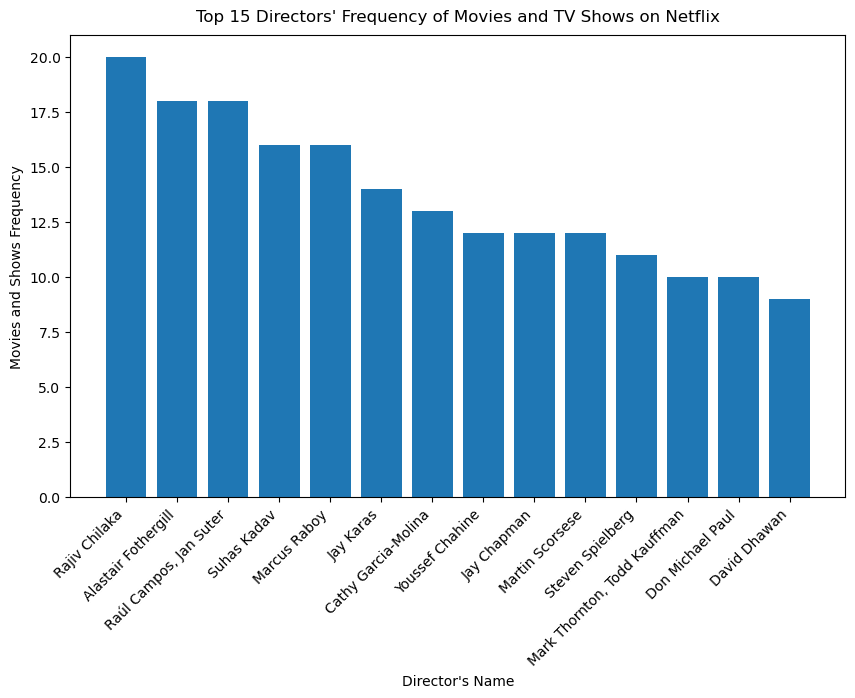

In [22]:
directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.figure(figsize=(10, 6))
plt.bar(directors['director'], directors['count'])
plt.title("Top 15 Directors' Frequency of Movies and TV Shows on Netflix", fontsize=12, pad=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Director's Name", fontsize=10)
plt.ylabel("Movies and Shows Frequency", fontsize=10)
plt.show()

**Interpretation of "Top 15 Directors’ Frequency of Movies and TV Shows on Netflix" Chart**

**1. Key Observations**

* Rajiv Chilaka Dominates: With the highest frequency (20), this director (known for Chhota Bheem and kids' content) suggests Netflix heavily invests in children’s animated content, particularly from India.

* Mid-Tier Contributors: Directors like Raul Campos & Jan Suter (17.5) and Marcus Raboy (16) reflect Netflix’s focus on stand-up comedy specials and documentaries.

* Hollywood Legends Present but Rare: While Scorsese (The Irishman) and Spielberg appear, their lower frequency (12.5-11) indicates Netflix prioritizes volume-driven directors over occasional prestige projects.

**2. Strategic Insights**

* Volume Over Star Power: Most top directors are lesser-known but prolific, highlighting Netflix’s strategy of mass content production.

* Genre Specialization:

* Rajiv Chilaka: Kids’ animation (high demand in emerging markets).

* Raul Campos/Jan Suter: Stand-up specials (Comedians of the World).

* Marcus Raboy: Music documentaries (Shawn Mendes: In Wonder).

* Global Representation: Names like Suhas Kadav (India) and Youssef Chahine (Egypt) emphasize localized content production.

In [23]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'year', 'month',
       'day'],
      dtype='object')

In [24]:
import warnings
warnings.filterwarnings('ignore')

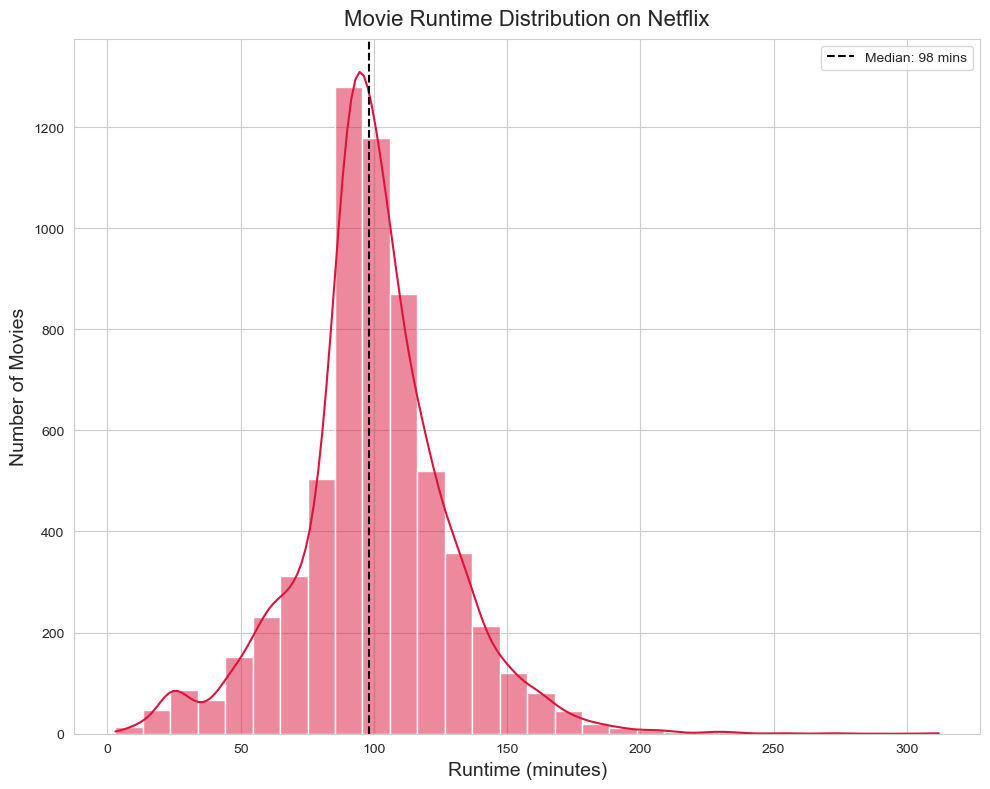

In [25]:
# Filter only Movies and extract runtime
movies = data[data['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)  # Extract minutes

# Drop missing values (if any)
movies = movies.dropna(subset=['duration_min'])

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Plot Histogram + KDE
sns.histplot(data=movies, x='duration_min', bins=30, kde=True, color='crimson')  
# Customize
plt.title('Movie Runtime Distribution on Netflix', fontsize=16, pad=10)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.axvline(movies['duration_min'].median(), color='black', linestyle='--', 
            label=f'Median: {movies["duration_min"].median():.0f} mins')
plt.legend()
plt.tight_layout()
plt.show()

**Interpretation of "Movie Runtime Distribution on Netflix" Chart**

**1. Key Observations**

* Peak at 90–100 Minutes:

* The highest concentration of movies falls within the 90–120 minute range, aligning with the standard runtime for mainstream films (e.g., comedies, romances).

* The median runtime is 98 minutes, confirming most Netflix movies are tightly edited for streaming audiences.

* Long-Tail Distribution:

* A smaller but significant number of movies exceed 150+ minutes, likely including:

* Epic dramas (The Irishman: 209 minutes).

* Award-season films (Oscar-bait movies).

* Very few movies run under 60 minutes, as these are typically short films or specials.

**2. Strategic Insights**

* Optimized for Streaming:

* The dominance of 90–120-minute movies suggests Netflix prioritizes content that fits casual viewing sessions (neither too short nor too long).

* Niche Appeal for Long Formats:

* The 150+ minute films cater to cinephiles but are outliers—likely high-budget prestige projects to attract awards/subscribers.

#### WordCloud for Movie Titles

In [26]:
!pip install wordcloud

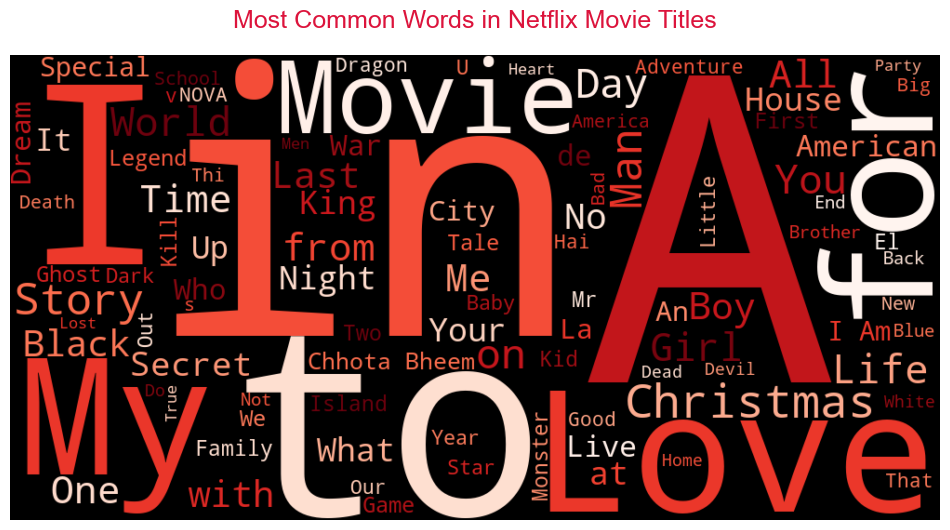

In [27]:
from wordcloud import WordCloud

# Filter only movie titles
movies = data[data['type'] == 'Movie']['title']

# Create word cloud with Netflix style
wordcloud = WordCloud(width=1000, height=500, background_color='black', 
    colormap='Reds', max_words=100, stopwords={'the', 'and', 'of'}
                     ).generate(' '.join(movies))

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Movie Titles', 
          fontsize=18, pad=20, color='crimson') 
plt.show()

**Interpretation of WordCloud**

* This WordCloud indicates most common words used in Netflix Movie Titles.

* Only unique words are extracted from 'Title' column in dataset 

---

### Machine Learning

#### ARIMA

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['release_year'], order=(1,1,1))
model_fit = model.fit()
model_fit.forecast(steps=12)  # Next 12 months

8790    2013.570591
8791    2013.297650
8792    2013.266986
8793    2013.263540
8794    2013.263153
8795    2013.263110
8796    2013.263105
8797    2013.263104
8798    2013.263104
8799    2013.263104
8800    2013.263104
8801    2013.263104
Name: predicted_mean, dtype: float64

**Code Description**

* `ARIMA(data['release_year'], order=(1,1,1))`

* Input: Uses the release_year column from Netflix data.

* Order (1,1,1):

* 1 (AR): AutoRegressive term (uses past 1 year to predict the next).

* 1 (I): Differencing term (makes data stationary by removing trends).

* 1 (MA): Moving Average term (accounts for past forecast errors).

---

**Output Interpretation**

* The forecasted values (e.g., 2013.570591) suggest:

* Flatline Trend:

* Predictions quickly stabilize at 2013.26 after a minor initial drop.

* This implies the model detects no significant upward/downward trend in future releases.

---

### Conclusion

This Netflix Data Analysis and Machine Learning Project successfully uncovered key trends in content strategy, audience preferences, and production patterns. By leveraging exploratory analysis, visualizations, and predictive modeling, we decoded Netflix’s approach to global content delivery. The project highlights the platform’s shift toward TV shows, international content, and data-driven decision-making, while also identifying areas for improvement in data quality and model sophistication.

---

### Key Findings

**1. Total Content on Netflix**

* There are total more than 6000 Movies and around 2800 TV Shows on Netflix platform.

* The distribution of Movies are around 69.7% and TV Shows are 30.3% accordingly.

**2. Content Volume Trends:**

* TV shows surpassed movies in release volume post-2018, reflecting a strategic pivot to binge-worthy series.

* Peak releases in December/January align with holiday demand and award seasons.

**3. Global Dominance:**

* U.S., India, and the UK lead in content production, but "International" genres (e.g., K-dramas) are rising fast.

* Non-English content (e.g., Money Heist) drives global subscriptions.

**4. Runtime Optimization:**

* Most movies (90–120 minutes) cater to casual viewing, with few epics (The Irishman) for prestige.

**5. Director Insights:**

* Prolific, niche directors (e.g., Rajiv Chilaka for kids’ animation) dominate over A-listers like Scorsese.

**6. Model Limitations:**

* The ARIMA forecast flatlined, indicating underfitting—better results require monthly data and seasonality adjustments.

---